<a href="https://colab.research.google.com/github/dimdred/Jupyter/blob/main/Space_Missions_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

     |████████████████████████████████| 20.6 MB 1.4 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [165]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_data.shape

(4324, 9)

In [7]:
df_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [8]:
df_data.isna().values.any()

True

In [9]:
df_data.duplicated().values.any()

False

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [10]:
df_data.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [166]:
df_data = df_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [12]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [167]:
df_data['Date'] = pd.to_datetime(df_data['Date'])

In [168]:
df_data['Price'] = pd.to_numeric(df_data['Price'].str.replace(',',''))

In [169]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,nan,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success


## Descriptive Statistics

In [16]:
df_data.describe()

,Price
count,964.00
mean,153.79
std,288.45
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [170]:
df_org = df_data['Organisation'].value_counts()
df_org.head()

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
Name: Organisation, dtype: int64

In [171]:
org_bar = px.bar(x=df_org.index, y=df_org.values, color=df_org.values, color_continuous_scale='Agsunset', title='Space mission launches by organisation')
org_bar.update_layout(xaxis_title='Number of Launches', yaxis_title='Organisation', coloraxis_showscale=False)
org_bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [19]:
active = df_data[df_data['Rocket_Status'] == 'StatusActive'].count()[0]
active

790

In [20]:
retired = df_data[df_data['Rocket_Status'] == 'StatusRetired'].count()[0] 
retired

3534

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [21]:
df_data['Mission_Status']

0       Success
1       Success
2       Success
3       Success
4       Success
         ...   
4319    Failure
4320    Success
4321    Failure
4322    Success
4323    Success
Name: Mission_Status, Length: 4324, dtype: object

In [22]:
mission_success = df_data.loc[df_data['Mission_Status'] == 'Success'].count()[0]
mission_success

3879

In [23]:
mission_failure = df_data.loc[df_data['Mission_Status'] == 'Failure'].count()[0]
mission_failure

339

In [24]:
df_data['Mission_Status'].isna().values.any()

False

In [172]:
df_data['Mission_Status'].unique()

array(['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure'],
      dtype=object)

In [173]:
hist_df = df_data[['Price', 'Date']].dropna()
hist_df

,Price,Date
0,50.00,2020-08-07 05:12:00+00:00
1,29.75,2020-08-06 04:01:00+00:00
3,65.00,2020-07-30 21:25:00+00:00
4,145.00,2020-07-30 11:50:00+00:00
5,64.68,2020-07-25 03:13:00+00:00
...,...,...
3855,59.00,1966-07-29 18:43:00+00:00
3971,63.23,1965-05-06 15:00:00+00:00
3993,63.23,1965-02-11 15:19:00+00:00
4000,63.23,1964-12-10 16:52:00+00:00


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

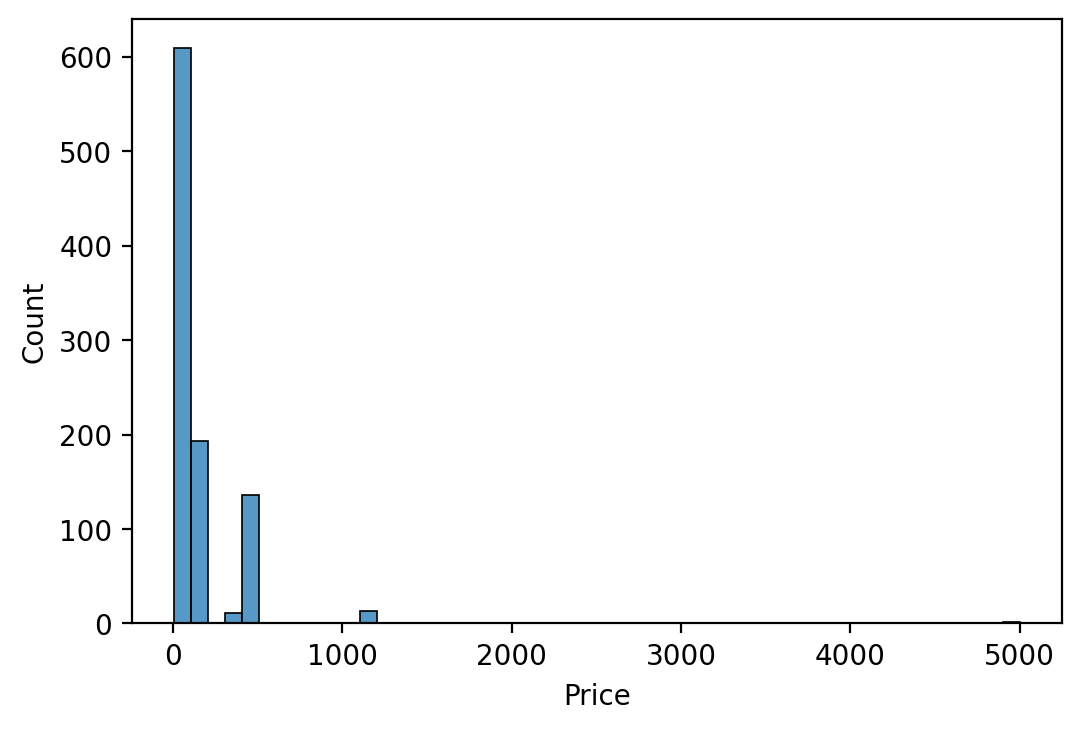

In [30]:
plt.figure(dpi=200)
sns.histplot(x=hist_df.Price, bins=50)
plt.show()

In [31]:
hist_df.Price.max()

5000.0

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [207]:
country_data = df_data.Location.str.split(', ', n = 3, expand = True)
country_data[2].isna().values.any()

True

In [208]:
df_data['Country'] = country_data[3]
df_data['Country'].fillna(value=country_data[2], inplace=True)
df_data['Country'].fillna(value=country_data[1], inplace=True)

In [245]:
df_data['Country'].unique()

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russian Federation', 'Iran, Islamic Republic of', 'France',
       'India', 'North Korea', 'Ukraine', 'South Korea', 'Brazil',
       'Kenya', 'Australia'], dtype=object)

In [237]:
df_data[df_data.Country == 'Pacific Ocean']

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country


In [248]:
df_data.replace('South Korea', "Korea, Republic of", inplace=True)

In [253]:
iso_arr = []
for c in df_data['Country'].values:
  iso_arr.append(countries.get(c).alpha3)

In [255]:
df_data['ISO'] = iso_arr

In [256]:
df_data.head(10)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,nan,Success,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,CHN
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2020-07-23 14:26:00+00:00,Soyuz 2.1a | Progress MS-15,StatusActive,48.50,Success,Kazakhstan,KAZ
7,CASC,"LC-101, Wenchang Satellite Launch Center, China",2020-07-23 04:41:00+00:00,Long March 5 | Tianwen-1,StatusActive,nan,Success,China,CHN
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",2020-07-20 21:30:00+00:00,Falcon 9 Block 5 | ANASIS-II,StatusActive,50.00,Success,USA,USA
9,JAXA,"LA-Y1, Tanegashima Space Center, Japan",2020-07-19 21:58:00+00:00,H-IIA 202 | Hope Mars Mission,StatusActive,90.00,Success,Japan,JPN


# Use a Choropleth Map to Show the Number of Failures by Country


In [243]:
countries.get("Korea, Democratic People's Republic of")

Country(name="Korea, Democratic People's Republic of", alpha2='KP', alpha3='PRK', numeric='408', apolitical_name="Korea, Democratic People's Republic of")

In [269]:
df_failure = df_data[df_data.Mission_Status != 'Success'].groupby('ISO', as_index=False).count()
df_failure['Number'] = df_failure['Organisation']
df_failure

,ISO,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Number
0,AUS,3,3,3,3,3,0,3,3,3
1,BRA,3,3,3,3,3,0,3,3,3
2,CHN,25,25,25,25,25,7,25,25,25
3,FRA,18,18,18,18,18,3,18,18,18
4,IND,13,13,13,13,13,8,13,13,13
5,IRN,9,9,9,9,9,0,9,9,9
6,ISR,2,2,2,2,2,0,2,2,2
7,JPN,13,13,13,13,13,0,13,13,13
8,KAZ,93,93,93,93,93,3,93,93,93
9,KOR,2,2,2,2,2,0,2,2,2


In [271]:
world_map = px.choropleth(df_failure,
                          locations='ISO',
                          color='Number', 
                          hover_name='ISO', 
                          color_continuous_scale=px.colors.sequential.matter)
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [272]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,nan,Success,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA


In [279]:
country_org_status = df_data.groupby(by=['Country', 
                                       'Organisation', 
                                       'Mission_Status'], as_index=False).agg({'ISO': pd.Series.count})
 
country_org_status = country_org_status.sort_values('ISO', ascending=False)
country_org_status.rename(columns={'ISO': 'Number'}, inplace=True)
country_org_status

,Country,Organisation,Mission_Status,Number
81,Russian Federation,RVSN USSR,Success,1119
58,Kazakhstan,RVSN USSR,Success,495
19,France,Arianespace,Success,267
9,China,CASC,Success,231
103,USA,General Dynamics,Success,203
...,...,...,...,...
91,USA,AMBA,Partial Failure,1
20,France,Arm??e de l'Air,Partial Failure,1
97,USA,Douglas,Success,1
98,USA,EER,Failure,1


In [282]:
burst = px.sunburst(country_org_status, 
                    path=['Country', 'Organisation', 'Mission_Status'], 
                    values='Number'
                   )
 
burst.update_layout(xaxis_title='Number of Mission', 
                    coloraxis_showscale=False)
 
burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [285]:
df_org_price = df_data.groupby('Organisation', as_index=False).sum('Price')
df_org_price.describe()

,Price
count,56.00
mean,"2,647.42"
std,"10,553.43"
min,0.00
25%,0.00
50%,0.00
75%,837.92
max,"76,280.00"


In [286]:
df_org_price

,Organisation,Price
0,AEB,0.00
1,AMBA,0.00
2,ASI,0.00
3,Arianespace,"16,345.00"
4,Arm??e de l'Air,0.00
5,Blue Origin,0.00
6,Boeing,"1,241.00"
7,CASC,"6,340.26"
8,CASIC,0.00
9,CECLES,0.00


# Analyse the Amount of Money Spent by Organisation per Launch

In [292]:
df_spent_org = df_data.groupby('Organisation').agg({'Date': pd.Series.count, 'Price': pd.Series.sum})
df_spent_org.rename(columns={'Date': 'Number of Launches'}, inplace=True)
df_spent_org['Money per Launch'] = df_spent_org.Price / df_spent_org['Number of Launches']
df_spent_org

,Number of Launches,Price,Money per Launch
Organisation,,,
AEB,3,0.00,0.00
AMBA,8,0.00,0.00
ASI,9,0.00,0.00
Arianespace,279,"16,345.00",58.58
Arm??e de l'Air,4,0.00,0.00
Blue Origin,12,0.00,0.00
Boeing,136,"1,241.00",9.12
CASC,251,"6,340.26",25.26
CASIC,5,0.00,0.00


# Chart the Number of Launches per Year

In [297]:
df_data.Date = pd.to_datetime(df_data.Date, utc=True)

In [303]:
df_data['Year'] = df_data.Date.dt.year 
df_year = df_data.groupby('Year', as_index=False).agg({'Date': pd.Series.count}) 
df_year

SyntaxError: ignored

In [311]:
chart = px.bar(df_year, x='Year', y='Date',color=df_year.Date, color_continuous_scale='Agsunset', title='Space mission launches by year')
chart.update_layout(xaxis_title='Number of Launches', yaxis_title='Year', coloraxis_showscale=False)
chart.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [319]:
df_data['Month'] = df_data.Date.dt.month
df_month = df_data.groupby('Month', as_index=False).agg({'Date': pd.Series.count}) 
df_month.rename({'Date':'Number'}, inplace=True)
df_month

,Month,Date
0,1,268
1,2,336
2,3,353
3,4,383
4,5,326
5,6,402
6,7,351
7,8,373
8,9,365
9,10,381


In [322]:
chart = px.bar(df_month, x='Month', y='Date',color=df_month.Date, color_continuous_scale='Agsunset', title='Space mission launches by month')
chart.update_layout(xaxis_title='Number of Launches', yaxis_title='Month', coloraxis_showscale=False)
chart.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [323]:
df_month.max()

Month     12
Date     450
dtype: int64

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [330]:
df_spend = df_data.groupby('Year', as_index=False).agg({'Price': pd.Series.mean}) 
df_spend.dropna(inplace=True)
df_spend

,Year,Price
7,1964,63.23
8,1965,63.23
9,1966,59.00
10,1967,196.62
11,1968,279.20
12,1969,609.50
13,1970,"1,160.00"
14,1971,"1,160.00"
15,1972,"1,160.00"
16,1973,"1,160.00"


In [334]:
l_chart = px.line(df_spend, x='Year', y='Price')
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Price')
l_chart.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [341]:
top_org = df_org.head(10)
top_org.index

Index(['RVSN USSR', 'Arianespace', 'CASC', 'General Dynamics', 'NASA',
       'VKS RF', 'US Air Force', 'ULA', 'Boeing', 'Martin Marietta'],
      dtype='object')

In [355]:
df_top = df_data[df_data.Organisation.isin(top_org.index)]
df_top = df_top.groupby(['Organisation','Year'], as_index=False).agg({'Date': pd.Series.count})
df_top.rename(columns={'Date':'Number'}, inplace=True)
df_top

,Organisation,Year,Number
0,Arianespace,1984,3
1,Arianespace,1985,4
2,Arianespace,1986,3
3,Arianespace,1987,2
4,Arianespace,1988,6
...,...,...,...
318,VKS RF,2016,4
319,VKS RF,2017,6
320,VKS RF,2018,5
321,VKS RF,2019,8


In [360]:
h_bar = px.bar(df_top, x=df_top.Number, y=df_top.Organisation, color=df_top.Year, orientation='h', title='Top 10 Organisation')
h_bar.update_layout(xaxis_title='Number of Launches', 
                          yaxis_title='Organisation')
h_bar.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [380]:
df_cold = df_data[df_data.Year <= 1991]
df_cold = df_cold[df_cold.Country.isin(['USA', 'Kazakhstan', 'Russian Federation'])]

In [381]:
df_cold_total = df_cold.groupby('Country', as_index=False).agg({'Date': pd.Series.count})
df_cold_total

,Country,Date
0,Kazakhstan,582
1,Russian Federation,1188
2,USA,662


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [382]:
df_cold_total.replace('Kazakhstan', 'USSR', inplace=True)
df_cold_total.replace('Russian Federation', 'USSR', inplace=True)

In [383]:
cold = px.pie(labels=df_cold_total.Country, values=df_cold_total.Date, title='USSR vs. USA', names=df_cold_total.Country, hole=0.4)
cold.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
cold.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [385]:
df_cold.replace('Kazakhstan', 'USSR', inplace=True)
df_cold.replace('Russian Federation', 'USSR', inplace=True)

In [387]:
df_cold_year = df_cold.groupby(['Country','Year'], as_index=False).agg({'Date': pd.Series.count})
df_cold_year

,Country,Year,Date
0,USA,1957,1
1,USA,1958,23
2,USA,1959,16
3,USA,1960,30
4,USA,1961,43
...,...,...,...
65,USSR,1987,42
66,USSR,1988,36
67,USSR,1989,26
68,USSR,1990,37


In [390]:
chart = px.bar(df_cold_year, x='Year', y='Date',color=df_cold_year.Country, color_continuous_scale='Agsunset', title='Space mission launches by year')
chart.update_layout(xaxis_title='Number of Launches', yaxis_title='Year', coloraxis_showscale=False)
chart.show()

## Chart the Total Number of Mission Failures Year on Year.

In [404]:
df_failure_data = df_data[df_data.Mission_Status != 'Success']
df_failure_count = df_failure_data.groupby('Year', as_index=False).agg({'Date': pd.Series.count})
df_failure_count.rename(columns={'Date':'Number'}, inplace=True)
df_failure_count

,Year,Number
0,1957,1
1,1958,22
2,1959,12
3,1960,20
4,1961,20
...,...,...
59,2016,4
60,2017,8
61,2018,4
62,2019,9


In [406]:
chart = px.bar(df_failure_count, x='Year', y='Number', color=df_failure_count.Number, color_continuous_scale='Magma', title='Failures')
chart.update_layout(xaxis_title='Year', yaxis_title='Number of Failures', coloraxis_showscale=False)
chart.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [412]:
df_percentage = df_failure_count.merge(df_year)
df_percentage.rename(columns={'Number': 'Failure', 'Date': 'Success'}, inplace=True)
df_percentage['Percentage'] = df_percentage.Failure / df_percentage.Success * 100
df_percentage

,Year,Failure,Success,Percentage
0,1957,1,3,33.33
1,1958,22,28,78.57
2,1959,12,20,60.00
3,1960,20,39,51.28
4,1961,20,52,38.46
...,...,...,...,...
59,2016,4,90,4.44
60,2017,8,92,8.70
61,2018,4,117,3.42
62,2019,9,109,8.26


In [416]:
chart = px.bar(df_percentage, x='Year', y='Percentage', color=df_percentage.Percentage, color_continuous_scale='Magma', title='Percentage of Failures')
chart.update_layout(xaxis_title='Year', yaxis_title='Percentage', coloraxis_showscale=False)
chart.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [429]:
df_lead = df_data.groupby(['Country','Year'], as_index=False).agg({'Date': pd.Series.count})
new_lead = df_lead.groupby('Year', as_index=False).agg({'Date': pd.Series.max})
top_country = new_lead.merge(df_lead, on=['Year','Date'])

In [430]:
top_country

,Year,Date,Country
0,1957,2,Kazakhstan
1,1958,23,USA
2,1959,16,USA
3,1960,30,USA
4,1961,43,USA
...,...,...,...
60,2016,27,USA
61,2017,30,USA
62,2018,39,China
63,2019,34,China


In [431]:
df_lead = df_data[df_data.Mission_Status == 'Success'].groupby(['Country','Year'], as_index=False).agg({'Date': pd.Series.count})
new_lead = df_lead.groupby('Year', as_index=False).agg({'Date': pd.Series.max})
top_country_suc = new_lead.merge(df_lead, on=['Year','Date'])

In [432]:
top_country_suc

,Year,Date,Country
0,1957,2,Kazakhstan
1,1958,5,USA
2,1959,6,USA
3,1960,16,USA
4,1961,27,USA
...,...,...,...
60,2016,26,USA
61,2017,30,USA
62,2018,38,China
63,2019,32,China


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [442]:
org = df_data.groupby(['Organisation','Year'], as_index=False).agg({'Date': pd.Series.count})
org

,Organisation,Year,Date
0,AEB,1997,1
1,AEB,1999,1
2,AEB,2003,1
3,AMBA,1958,7
4,AMBA,1967,1
...,...,...,...
658,VKS RF,2020,3
659,Virgin Orbit,2020,1
660,Yuzhmash,1969,1
661,Yuzhmash,1991,1


In [444]:
org_max = org.groupby('Year', as_index=False).agg({'Date': pd.Series.max})
org_max

,Year,Date
0,1957,2
1,1958,12
2,1959,10
3,1960,21
4,1961,23
...,...,...
59,2016,22
60,2017,18
61,2018,37
62,2019,27


In [447]:
best_organisation = org.merge(org_max, on=['Year', 'Date'])
best_organisation.rename(columns={'Date': 'Number'}, inplace=True)
best_organisation

,Organisation,Year,Number
0,Arianespace,1996,10
1,Boeing,1996,10
2,Arianespace,1997,11
3,Boeing,1997,11
4,Arianespace,2000,12
...,...,...,...
66,US Air Force,1962,41
67,US Navy,1958,12
68,VKS RF,1992,14
69,VKS RF,1993,26


In [454]:
chart = px.bar(best_organisation, x='Year', y='Number', color=best_organisation.Organisation, color_continuous_scale='Magma', title='Best Organisation per Year')
chart.update_layout(xaxis_title='Year', yaxis_title='Organisation', coloraxis_showscale=False)
chart.show()